In [39]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt #ARIMA Problem
from statsmodels.tsa.stattools import adfuller  # Hypothesis testing to check Stationary or non stationary
from statsmodels.tsa.seasonal import seasonal_decompose #Decomposition-trend,seasonal It
import matplotlib.pyplot as plt   #Plotting(Graphs)

In [3]:
import os
os.getcwd()

'C:\\Users\\Dell\\PYTHON'

In [4]:
sales_data=pd.read_csv("Tractor-Sales.csv")
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
sales_data.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<AxesSubplot:>

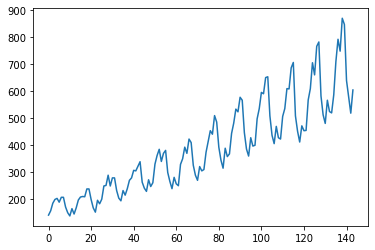

In [7]:
sales_data["Number of Tractor Sold"].plot()

In [8]:
sales_data

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [9]:
?pd.date_range

In [10]:
pd.date_range("2003-01-01", freq="MS", periods=6)

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01'],
              dtype='datetime64[ns]', freq='MS')

### Converting Normal Data into Time Series

In [11]:
data_range_val=pd.date_range("2003-01-01", freq="MS", periods=len(sales_data))

In [12]:
data_range_val

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [13]:
sales_data.set_index(data_range_val, inplace=True)

In [14]:
sales_data

,Month-Year,Number of Tractor Sold
2003-01-01,Jan-03,141
2003-02-01,Feb-03,157
2003-03-01,Mar-03,185
2003-04-01,Apr-03,199
2003-05-01,May-03,203
...,...,...
2014-08-01,Aug-14,848
2014-09-01,Sep-14,640
2014-10-01,Oct-14,581
2014-11-01,Nov-14,519


<AxesSubplot:>

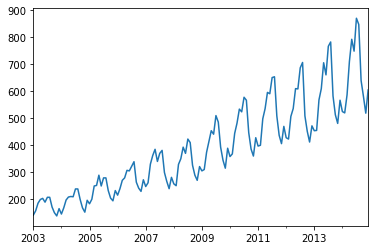

In [15]:
sales_data["Number of Tractor Sold"].plot()

In [17]:
sales_data.rename(columns={"Number of Tractor Sold":"Tractor_Sales"},inplace=True)

In [18]:
sales_data

,Month-Year,Tractor_Sales
2003-01-01,Jan-03,141
2003-02-01,Feb-03,157
2003-03-01,Mar-03,185
2003-04-01,Apr-03,199
2003-05-01,May-03,203
...,...,...
2014-08-01,Aug-14,848
2014-09-01,Sep-14,640
2014-10-01,Oct-14,581
2014-11-01,Nov-14,519


In [19]:
sales_data.isnull().sum()

Month-Year       0
Tractor_Sales    0
dtype: int64

In [20]:
ts=sales_data.Tractor_Sales

In [21]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64

### Understanding Data

<AxesSubplot:>

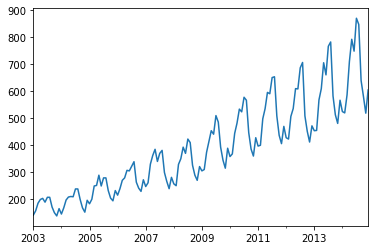

In [22]:
ts.plot()

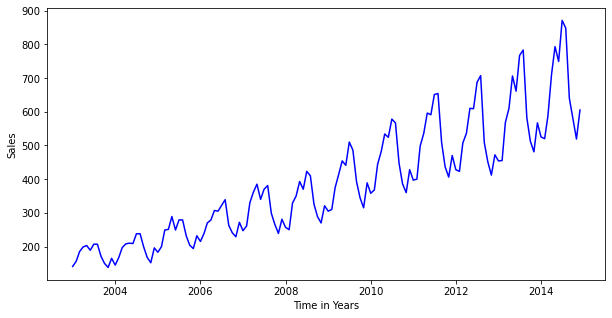

In [26]:
plt.figure(figsize=(10,5)) # it helps to magange the image size of graph
plt.plot(ts, color="b")    # By default it plots a line graph
plt.xlabel("Time in Years")
plt.ylabel("Sales")
plt.show()

### Decomposition

In [27]:
decompose=seasonal_decompose(ts, model="multiplicative", two_sided=False, extrapolate_trend=4)

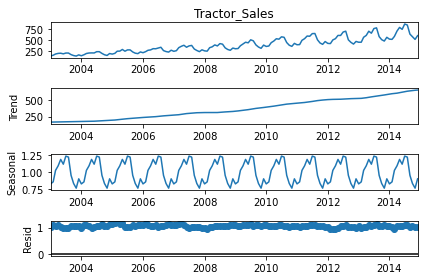

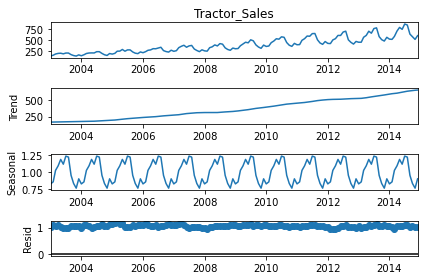

In [29]:
decompose.plot()

In [30]:
decompose.resid

2003-01-01    1.028907
2003-02-01    1.099557
2003-03-01    1.074350
2003-04-01    1.078424
2003-05-01    1.007438
                ...   
2014-08-01    1.078833
2014-09-01    1.038754
2014-10-01    1.071776
2014-11-01    1.038297
2014-12-01    1.018544
Freq: MS, Name: resid, Length: 144, dtype: float64

In [31]:
decompose.seasonal

2003-01-01    0.823508
2003-02-01    0.853891
2003-03-01    1.024830
2003-04-01    1.092962
2003-05-01    1.187805
                ...   
2014-08-01    1.222687
2014-09-01    0.950868
2014-10-01    0.829943
2014-11-01    0.760143
2014-12-01    0.898956
Freq: MS, Name: seasonal, Length: 144, dtype: float64

In [32]:
decompose.trend

2003-01-01    166.408333
2003-02-01    167.216667
2003-03-01    168.025000
2003-04-01    168.833333
2003-05-01    169.641667
                 ...    
2014-08-01    642.875000
2014-09-01    647.958333
2014-10-01    653.166667
2014-11-01    657.583333
2014-12-01    660.750000
Freq: MS, Name: trend, Length: 144, dtype: float64

In [33]:
Decom=pd.concat([decompose.seasonal, decompose.trend, decompose.resid, decompose.observed], axis=1)

In [34]:
Decom

,seasonal,trend,resid,Tractor_Sales
2003-01-01,0.823508,166.408333,1.028907,141.0
2003-02-01,0.853891,167.216667,1.099557,157.0
2003-03-01,1.024830,168.025000,1.074350,185.0
2003-04-01,1.092962,168.833333,1.078424,199.0
2003-05-01,1.187805,169.641667,1.007438,203.0
...,...,...,...,...
2014-08-01,1.222687,642.875000,1.078833,848.0
2014-09-01,0.950868,647.958333,1.038754,640.0
2014-10-01,0.829943,653.166667,1.071776,581.0
2014-11-01,0.760143,657.583333,1.038297,519.0


In [35]:
Decom.to_csv("Decomposition.csv") 

In [36]:
decompose_data=pd.concat([decompose.trend, decompose.seasonal, decompose.resid, decompose.observed], axis=1)
decompose_data.columns=['Trend', 'SI', 'Irregular', 'Actual']

In [37]:
decompose_data

,Trend,SI,Irregular,Actual
2003-01-01,166.408333,0.823508,1.028907,141.0
2003-02-01,167.216667,0.853891,1.099557,157.0
2003-03-01,168.025000,1.024830,1.074350,185.0
2003-04-01,168.833333,1.092962,1.078424,199.0
2003-05-01,169.641667,1.187805,1.007438,203.0
...,...,...,...,...
2014-08-01,642.875000,1.222687,1.078833,848.0
2014-09-01,647.958333,0.950868,1.038754,640.0
2014-10-01,653.166667,0.829943,1.071776,581.0
2014-11-01,657.583333,0.760143,1.038297,519.0


In [40]:
# decompose_data.to_csv("decompose_data.csv")

### Moving Average

In [41]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64